In [1]:
import pandas as pd
df = pd.read_csv("OSF.csv")
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [2]:
df['text'] = df.text_
df = df.drop(['category', 'rating','text_'], axis = 1)
df

,label,text
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
...,...,...
40427,OR,I had read some reviews saying that this bra r...
40428,CG,I wasn't sure exactly what it would be. It is ...
40429,OR,"You can wear the hood by itself, wear it with ..."
40430,CG,I liked nothing about this dress. The only rea...


In [3]:
df.label = df.label.replace({
    'OR': 0,
    'CG': 1
})
df

,label,text
0,1,"Love this! Well made, sturdy, and very comfor..."
1,1,"love it, a great upgrade from the original. I..."
2,1,This pillow saved my back. I love the look and...
3,1,"Missing information on how to use it, but it i..."
4,1,Very nice set. Good quality. We have had the s...
...,...,...
40427,0,I had read some reviews saying that this bra r...
40428,1,I wasn't sure exactly what it would be. It is ...
40429,0,"You can wear the hood by itself, wear it with ..."
40430,1,I liked nothing about this dress. The only rea...


In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='label', ylabel='count'>

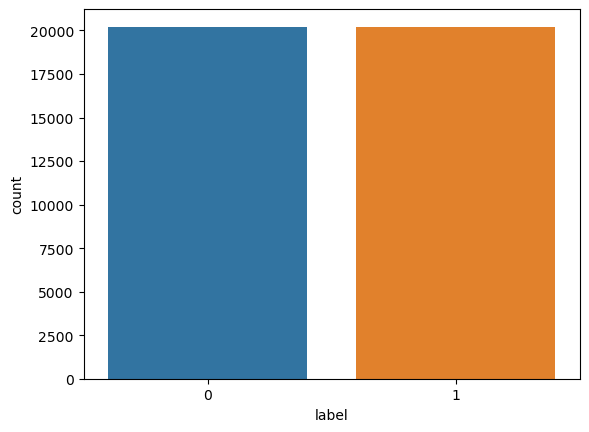

In [5]:
sn.countplot(x = df.label)

In [6]:
import nltk
import re
import string

def text_cleaning(text):
    """
    Preprocessing of text. 
    Lowercasing,
    remove links, 
    remove special characters,
    remove word containing numbers,
    """
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [7]:
df.text = df.text.apply(text_cleaning)
df

,label,text
0,1,love this well made sturdy and very comfor...
1,1,love it a great upgrade from the original i...
2,1,this pillow saved my back i love the look and...
3,1,missing information on how to use it but it i...
4,1,very nice set good quality we have had the s...
...,...,...
40427,0,i had read some reviews saying that this bra r...
40428,1,i wasn t sure exactly what it would be it is ...
40429,0,you can wear the hood by itself wear it with ...
40430,1,i liked nothing about this dress the only rea...


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def text_preprocessing(text):
    doc = nlp(text)
    tokens = set()
    for token in doc:
        if not token.is_stop:
            tokens.add(token.lemma_)
    return ' '.join(tokens)
    

In [ ]:
df.text = df.text.apply(text_preprocessing)
df

In [8]:
X = df.text
y = df.label

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1,2))
X = cv.fit_transform(X)
print(X.shape)

(40432, 557739)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 3,
                                                    test_size = 0.2
                                                   )

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

def print_results(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (5,4))
    sn.heatmap(cm, annot = True, fmt="d")
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4033
           1       0.95      0.93      0.94      4054

    accuracy                           0.94      8087
   macro avg       0.94      0.94      0.94      8087
weighted avg       0.94      0.94      0.94      8087



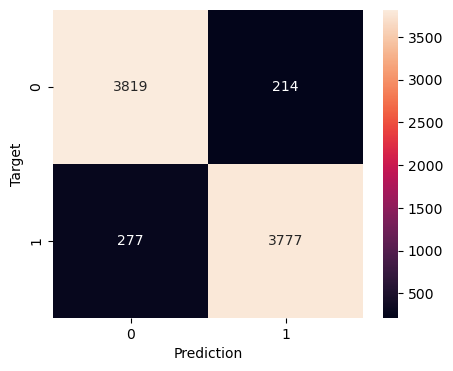

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_results(y_test, y_pred)

In [ ]:
import pickle
model.dump()